import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
# Załadowanie danych

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
test_set = pd.read_csv('../test_set.csv')
test_set = test_set.rename(columns={"Unnamed: 0": "index"}).set_index("index")
test_set.drop(['track_id', 'track_album_id', 'playlist_id'], axis = 1, inplace=True)
train_set = pd.read_csv('../train_set.csv')
train_set = train_set.rename(columns={"Unnamed: 0": "index"}).set_index("index")
train_set.drop(['track_id', 'track_album_id', 'playlist_id'], axis = 1, inplace=True)
train_set = train_set[train_set['duration_ms'] >= 30000]

In [63]:
y_train, y_test = train_set['playlist_genre'], test_set['playlist_genre']
X_train, X_test = train_set.loc[:, ['track_popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
          'liveness', 'valence', 'tempo']], test_set.loc[:, ['track_popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
          'liveness', 'valence', 'tempo']]

## Sprawdzenie czy po podziale dane mają takie same wymiary

In [64]:
X_train.shape

(26264, 11)

In [65]:
y_train.shape

(26264,)

In [66]:
X_test.shape

(6567, 11)

In [67]:
y_test.shape

(6567,)

# Standaryzacja

In [68]:
from sklearn.preprocessing import PowerTransformer

In [69]:
scaler = PowerTransformer()

In [70]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Zakodowanie gatunków jako wartości numeryczne

W Pythonie do modelu można wprowadzać tylko liczby, dlatego gatunki muzyczne trzba zakodować jako liczby.

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [73]:
y_train

array([1, 2, 0, ..., 5, 2, 0])

In [74]:
le.inverse_transform(y_train)

array(['latin', 'pop', 'edm', ..., 'rock', 'pop', 'edm'], dtype=object)

In [75]:
y_test = le.transform(y_test)
y_test

array([1, 3, 0, ..., 2, 2, 0])

In [76]:
le.inverse_transform(y_test)

array(['latin', 'r&b', 'edm', ..., 'pop', 'pop', 'edm'], dtype=object)

# Proste modele

## Regresja logistyczna

In [77]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score

In [78]:
log_reg = LogisticRegression(random_state=1)
log_reg_cv = cross_val_score(log_reg, X_train, y_train, cv = 5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [79]:
print('Logistic Regression Accuracy (cv): {}'.format(log_reg_cv))
print("Mean cv Logistc Regression Accuracy: {}".format(np.mean(log_reg_cv)))

Logistic Regression Accuracy (cv): [0.46079178 0.47058824 0.45688178 0.45906321 0.44859101]
Mean cv Logistc Regression Accuracy: 0.4591832043574821


#### Regresja logistyczna z regularyzacją

In [80]:
params = {'C': [.0001, .001, .01, .1, 1, 10, 100, 1000], 'random_state': [1]}

In [81]:
log_reg_grid = GridSearchCV(log_reg, params, verbose = 2, n_jobs = -1)
log_reg_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    6.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    6.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'random_state': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [82]:
log_reg_grid.best_score_

0.4602497715504112

In [83]:
log_reg_grid.best_params_

{'C': 1, 'random_state': 1}

### Regresja Logistyczna wielomianowa

In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [85]:
poly_2 = PolynomialFeatures(2)
X_train_poly_2 = poly_2.fit_transform(X_train)

In [86]:
log_reg_grid_poly_2 = GridSearchCV(log_reg, params, verbose = 2, n_jobs = -1)
log_reg_grid_poly_2.fit(X_train_poly_2, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:   30.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   31.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'random_state': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [87]:
log_reg_grid_poly_2.best_score_

0.5048355162960707

In [88]:
log_reg_grid_poly_2.best_params_

{'C': 10, 'random_state': 1}

In [89]:
poly_3 = PolynomialFeatures(3)
X_train_poly_3 = poly_3.fit_transform(X_train)

In [90]:
log_reg_grid_poly_3 = GridSearchCV(log_reg, params, verbose = 2, n_jobs = -1)
log_reg_grid_poly_3.fit(X_train_poly_3, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  6.1min remaining:   33.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'random_state': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [91]:
log_reg_grid_poly_3.best_score_

0.522540359427353

In [92]:
log_reg_grid_poly_3.best_params_

{'C': 0.1, 'random_state': 1}

In [93]:
poly_4 = PolynomialFeatures(4)
X_train_poly_4 = poly_4.fit_transform(X_train)

In [94]:
log_reg_grid_poly_4 = cross_val_score(log_reg, X_train_poly_4, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: 

In [95]:
np.mean(log_reg_grid_poly_4)

0.5055580893233401

## KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
params = {'n_neighbors': [1, 2, 5, 10, 20, 30, 50, 100, 200]}

In [98]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, params)

In [99]:
knn_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 5, 10, 20, 30, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
knn_cv.best_score_

0.4891105696009747

In [101]:
knn_cv.best_params_

{'n_neighbors': 50}

In [102]:
accuracy = []
for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv = 3)
    #print('K = {} | Accuracy = {}'.format(k, np.mean(cv_scores)))
    accuracy.append(np.mean(cv_scores))

<IPython.core.display.Javascript object>

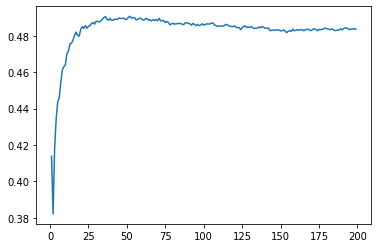

In [103]:
sns.lineplot(x = range(1,200), y = accuracy)

## SVC

In [104]:
from sklearn.svm import LinearSVC

In [105]:
svc_linear = LinearSVC()
svc_cv = cross_val_score(svc_linear, X_train, y_train, cv = 5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [106]:
print('Accuracy dla Liniowego Support Vector Classifiera wynosi (cv):{}'.format(svc_cv))
print('Średnia Accuracy ze wszystkich cv wynosi: {}'.format(np.mean(svc_cv)))

Accuracy dla Liniowego Support Vector Classifiera wynosi (cv):[0.45051389 0.46049876 0.4521226  0.45201828 0.45049505]
Średnia Accuracy ze wszystkich cv wynosi: 0.4531297163310139


## Drzewa

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
tree_clf = DecisionTreeClassifier()
tree_cv = cross_val_score(tree_clf, X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [109]:
print('Accuracy dla podstawowego modelu drzewa wynosi (cv):{}'.format(tree_cv))
print('Średnia Accuracy ze wszystkich cv wynosi: {}'.format(np.mean(tree_cv)))

Accuracy dla podstawowego modelu drzewa wynosi (cv):[0.41109969 0.41923692 0.41357249]
Średnia Accuracy ze wszystkich cv wynosi: 0.41463636712414914


In [110]:
params = {'criterion': ['gini', 'entropy'],
         'max_depth': [None, 10, 20, 30, 50],
         'min_samples_split': [2, 5, 10, 20],
         'min_samples_leaf': [1, 5, 10, 20, 30, 40],
         'max_features': [None, 1, 2, 5],
         'random_state': [1]
         }

In [111]:
tree_clf = GridSearchCV(tree_clf, params)

In [112]:
tree_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 50],
          

In [113]:
tree_clf.best_score_

0.4726241242765763

In [114]:
tree_clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 30,
 'min_samples_split': 2,
 'random_state': 1}

## Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
params = {'n_estimators': [100, 250, 500],
         'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [10, 20, 30],
         'max_features': [None, 'auto']}

In [117]:
rf = RandomForestClassifier(random_state=1)
rf_cv = cross_val_score(rf, X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [118]:
print('Accuracy dla podstawowego modelu random forest wynosi (cv):{}'.format(rf_cv))
print('Średnia Accuracy ze wszystkich cv wynosi: {}'.format(np.mean(rf_cv)))

Accuracy dla podstawowego modelu random forest wynosi (cv):[0.49765902 0.48880512 0.49160288]
Średnia Accuracy ze wszystkich cv wynosi: 0.4926890041060117


In [119]:
clf = GridSearchCV(rf, params, verbose = 2, n_jobs = 2)

In [120]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  6.7min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 18.0min
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed: 41.7min
[Parallel(n_jobs=2)]: Done 486 out of 486 | elapsed: 53.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={

In [121]:
clf.best_score_

0.5409305513250077

In [122]:
clf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 250}

In [123]:
pd.DataFrame({'Model': ['Log Reg', 'KNN', 'SVC', 'Decision Tree', 'Random Forest'],
             'Accuracy': [log_reg_grid_poly_3.best_score_, knn_cv.best_score_, np.mean(svc_cv), tree_clf.best_score_, clf.best_score_]})

,Model,Accuracy
0,Log Reg,0.522540
1,KNN,0.489111
2,SVC,0.453130
3,Decision Tree,0.472624
4,Random Forest,0.540931


Widac, dla modeli drzewiastych nie ma zadnej roznicy czy dane byly przeskalowane, czy nie. Bardzo duzy wzrost KNN, SVC oraz dla regresji logistycznej (zwłaszcza podniesionej do 3 potęgi).